## Project 5: Storytelling Data Visualization on Exchange Rates

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt

In [3]:
exchange_rates = pd.read_csv('Downloads/euro-daily-hist_1999_2020.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

- The data set have 5699 rows, 41 columns
- The are some null values

# Cleaning

In [7]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [8]:
euro_to_dollar = exchange_rates[['Time','US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: count, Length: 3528, dtype: int64

In [9]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'].value_counts()

US_dollar
1.2276    9
1.1215    8
1.1305    7
1.3373    6
1.3532    6
         ..
1.2571    1
1.2610    1
1.2651    1
1.2632    1
1.2193    1
Name: count, Length: 3527, dtype: int64

In [10]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


# Rolling mean

In [12]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

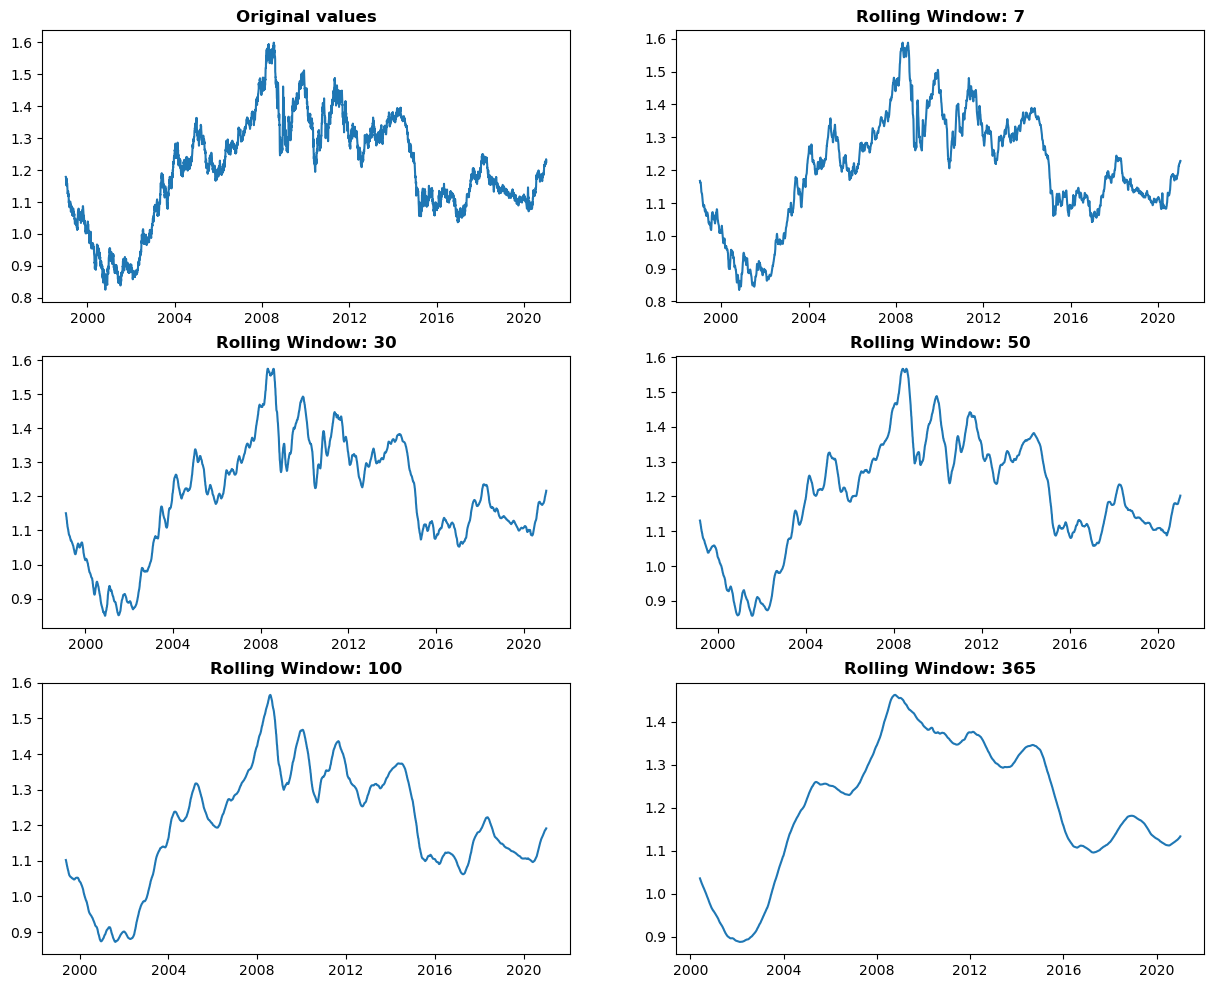

In [13]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.title('Original values',weight = 'bold')
for i,r in zip(range(5),[7, 30, 50, 100, 365]):
    plt.subplot(3,2,i+2)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'].rolling(r).mean())
    plt.title('Rolling Window: ' + str(r),weight = 'bold')
plt.show()

# Graph
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In [15]:
euro_to_dollar['Time'].describe()

count                             5637
mean     2010-01-02 20:36:39.467802112
min                1999-01-04 00:00:00
25%                2004-07-07 00:00:00
50%                2010-01-06 00:00:00
75%                2015-07-08 00:00:00
max                2021-01-08 00:00:00
Name: Time, dtype: object

In [16]:
euro_to_dollar['Year'] = euro_to_dollar['Time'].dt.year
euro_to_dollar.head()

,Time,US_dollar,rolling_mean,Year
0,1999-01-04,1.1789,NaN,1999
1,1999-01-05,1.1790,NaN,1999
2,1999-01-06,1.1743,NaN,1999
3,1999-01-07,1.1632,NaN,1999
4,1999-01-08,1.1659,NaN,1999


Isolate data

In [18]:
Bush = euro_to_dollar[(euro_to_dollar['Year']>=2001)&(euro_to_dollar['Year']<2009)]
Obama = euro_to_dollar[(euro_to_dollar['Year']>=2009)&(euro_to_dollar['Year']<2017)]
Trump = euro_to_dollar[(euro_to_dollar['Year']>=2017)&(euro_to_dollar['Year']<2021)]
All = euro_to_dollar[(euro_to_dollar['Year']>=2001)&(euro_to_dollar['Year']<2021)]

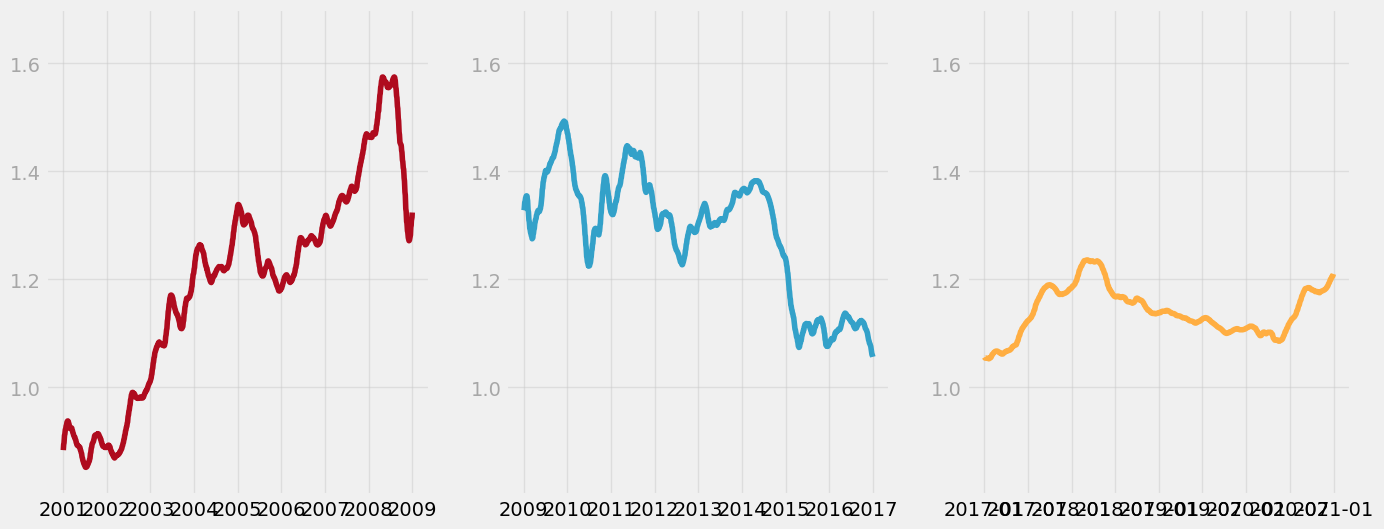

In [19]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(1,3,figsize=(15,6))
for i in ax:
    i.set_ylim(0.8, 1.7)
    i.set_yticks([1.0, 1.2, 1.4, 1.6])
    i.set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
    i.grid(alpha=0.5)    
ax[0].plot(Bush['Time'],Bush['rolling_mean'], color='#af0b1e')
ax[1].plot(Obama['Time'],Obama['rolling_mean'], color='#33A1C9')
ax[2].plot(Trump['Time'],Trump['rolling_mean'], color='#ffae42')
plt.show()

Get x-coordinates

In [21]:
tick1 = ax[0].get_xticks()
print(list(tick1))
tick2 = ax[1].get_xticks()
print(list(tick2))
tick3= ax[2].get_xticks()
print(list(tick3))

[10957.0, 11323.0, 11688.0, 12053.0, 12418.0, 12784.0, 13149.0, 13514.0, 13879.0, 14245.0]
[13879.0, 14245.0, 14610.0, 14975.0, 15340.0, 15706.0, 16071.0, 16436.0, 16801.0, 17167.0]
[17167.0, 17348.0, 17532.0, 17713.0, 17897.0, 18078.0, 18262.0, 18444.0, 18628.0]


Set xtick lables

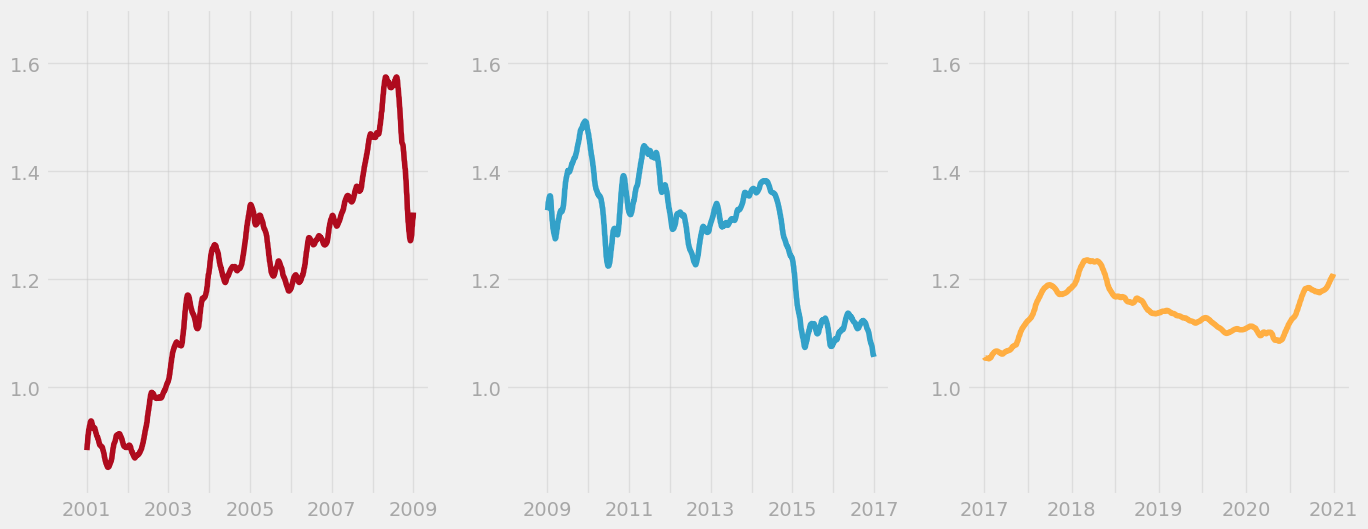

In [23]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(1,3,figsize=(15,6))
for i in ax:
    i.set_ylim(0.8, 1.7)
    i.set_yticks([1.0, 1.2, 1.4, 1.6])
    i.set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
    i.grid(alpha=0.5)    
    
ax[0].plot(Bush['Time'],Bush['rolling_mean'], color='#af0b1e')
ax[0].set_xticks([10957.0, 11323.0, 11688.0, 12053.0, 12418.0, 12784.0, 13149.0, 13514.0, 13879.0, 14245.0])
ax[0].set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],alpha=0.3)

ax[1].plot(Obama['Time'],Obama['rolling_mean'], color='#33A1C9')
ax[1].set_xticks([13879.0, 14245.0, 14610.0, 14975.0, 15340.0, 15706.0, 16071.0, 16436.0, 16801.0, 17167.0])
ax[1].set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],alpha=0.3)

ax[2].plot(Trump['Time'],Trump['rolling_mean'], color='#ffae42')
ax[2].set_xticks([17167.0, 17348.0, 17532.0, 17713.0, 17897.0, 18078.0, 18262.0, 18444.0, 18628.0])
ax[2].set_xticklabels(['2017','','2018','','2019','','2020','','2021'],alpha=0.3)

plt.show()

Add title

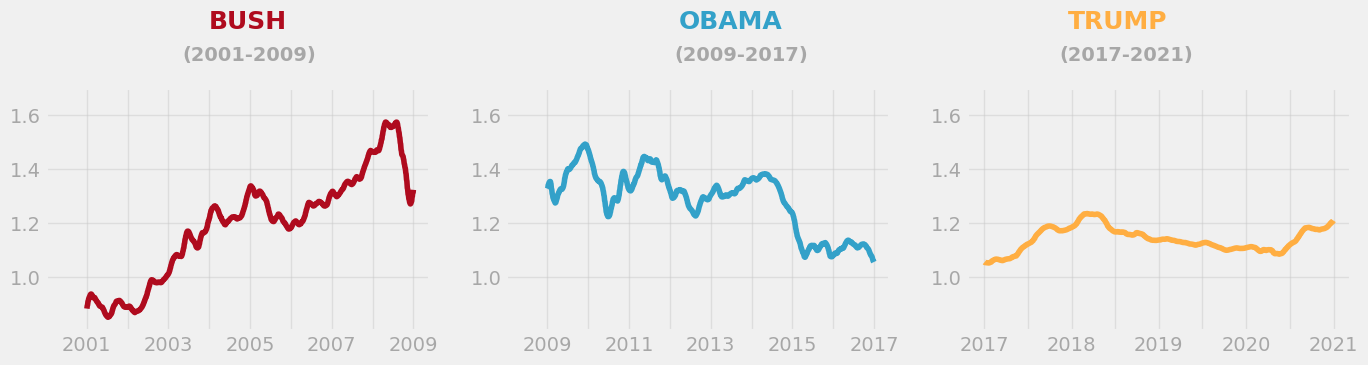

In [25]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(1,3,figsize=(15,3))
for i in ax:
    i.set_ylim(0.8, 1.7)
    i.set_yticks([1.0, 1.2, 1.4, 1.6])
    i.set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
    i.grid(alpha=0.5)    
    
ax[0].plot(Bush['Time'],Bush['rolling_mean'], color='#af0b1e')
ax[0].set_xticks([10957.0, 11323.0, 11688.0, 12053.0, 12418.0, 12784.0, 13149.0, 13514.0, 13879.0, 14245.0])
ax[0].set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],alpha=0.3)
ax[0].text(12418, 1.92, 'BUSH', fontsize=18, weight='bold', color='#af0b1e')
ax[0].text(12180, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

ax[1].plot(Obama['Time'],Obama['rolling_mean'], color='#33A1C9')
ax[1].set_xticks([13879.0, 14245.0, 14610.0, 14975.0, 15340.0, 15706.0, 16071.0, 16436.0, 16801.0, 17167.0])
ax[1].set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],alpha=0.3)
ax[1].text(15418, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#33A1C9')
ax[1].text(15380, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

ax[2].plot(Trump['Time'],Trump['rolling_mean'], color='#ffae42')
ax[2].set_xticks([17167.0, 17348.0, 17532.0, 17713.0, 17897.0, 18078.0, 18262.0, 18444.0, 18628.0])
ax[2].set_xticklabels(['2017','','2018','','2019','','2020','','2021'],alpha=0.3)
ax[2].text(17518, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#ffae42')
ax[2].text(17480, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

plt.show()

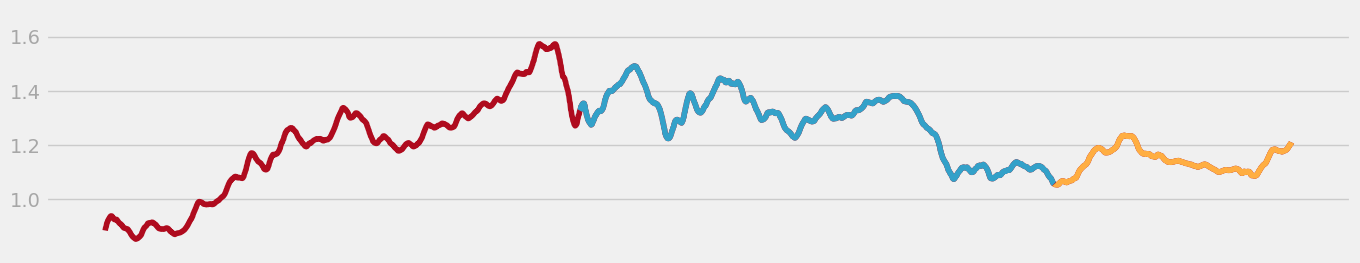

In [26]:
style.use('fivethirtyeight')
fig, ax = plt.subplots(1,1,figsize=(15,3))
ax.plot(All['Time'],All['rolling_mean'], color='#af0b1e')
ax.plot(Obama['Time'],Obama['rolling_mean'], color='#33A1C9')
ax.plot(Trump['Time'],Trump['rolling_mean'], color='#ffae42')
ax.set_ylim(0.8, 1.7)
ax.set_yticks([1.0, 1.2, 1.4, 1.6])
ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
ax.set_xticklabels([])
ax.grid(visible = None,axis='x')    
plt.show()

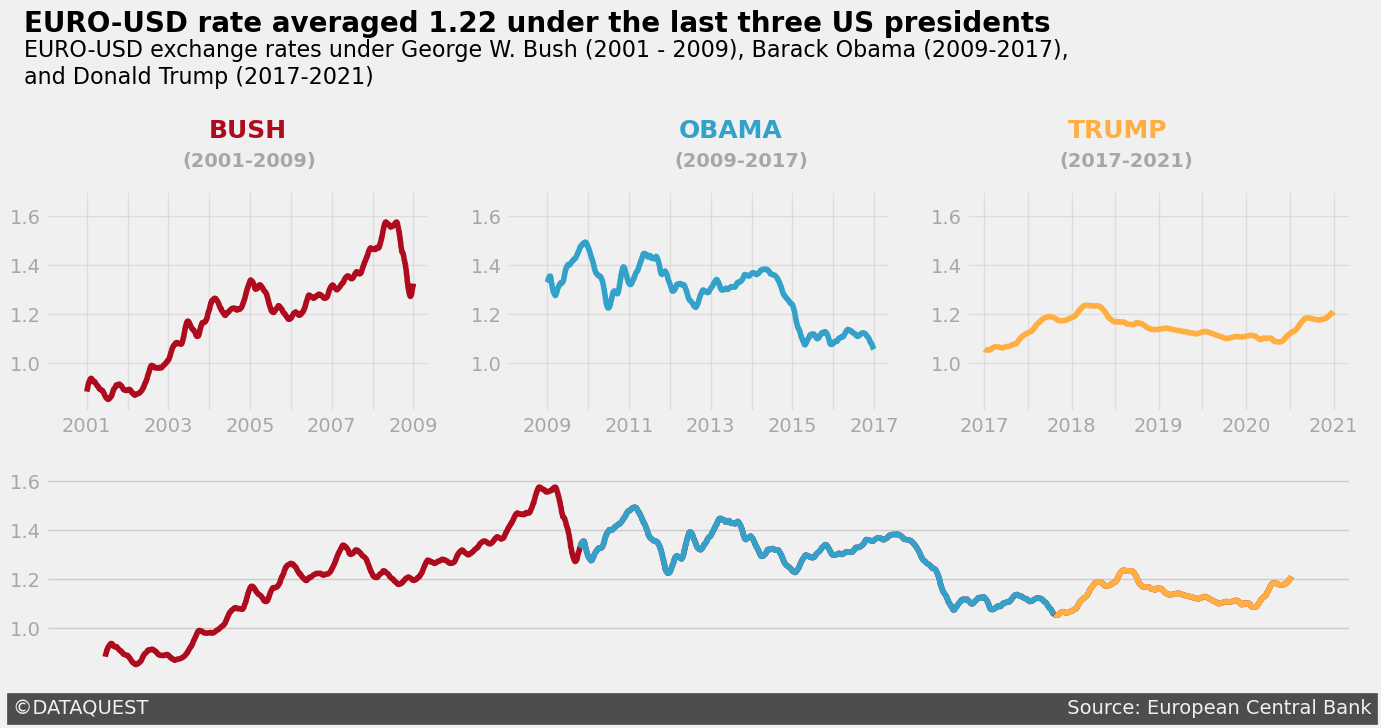

In [27]:
style.use('fivethirtyeight')
plt.figure(figsize=(15,6))
    
plt.subplot(2,3,1).plot(Bush['Time'],Bush['rolling_mean'], color='#af0b1e')
plt.subplot(2,3,1).set_xticks([10957.0, 11323.0, 11688.0, 12053.0, 12418.0, 12784.0, 13149.0, 13514.0, 13879.0, 14245.0])
plt.subplot(2,3,1).set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],alpha=0.3)
plt.subplot(2,3,1).text(12418, 1.92, 'BUSH', fontsize=18, weight='bold', color='#af0b1e')
plt.subplot(2,3,1).text(12180, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

plt.subplot(2,3,2).plot(Obama['Time'],Obama['rolling_mean'], color='#33A1C9')
plt.subplot(2,3,2).set_xticks([13879.0, 14245.0, 14610.0, 14975.0, 15340.0, 15706.0, 16071.0, 16436.0, 16801.0, 17167.0])
plt.subplot(2,3,2).set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],alpha=0.3)
plt.subplot(2,3,2).text(15418, 1.92, 'OBAMA', fontsize=18, weight='bold', color='#33A1C9')
plt.subplot(2,3,2).text(15380, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

plt.subplot(2,3,3).plot(Trump['Time'],Trump['rolling_mean'], color='#ffae42')
plt.subplot(2,3,3).set_xticks([17167.0, 17348.0, 17532.0, 17713.0, 17897.0, 18078.0, 18262.0, 18444.0, 18628.0])
plt.subplot(2,3,3).set_xticklabels(['2017','','2018','','2019','','2020','','2021'],alpha=0.3)
plt.subplot(2,3,3).text(17518, 1.92, 'TRUMP', fontsize=18, weight='bold', color='#ffae42')
plt.subplot(2,3,3).text(17480, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

for i in range(3):
    plt.subplot(2,3,i+1).set_ylim(0.8, 1.7)
    plt.subplot(2,3,i+1).set_yticks([1.0, 1.2, 1.4, 1.6])
    plt.subplot(2,3,i+1).set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
    plt.subplot(2,3,i+1).grid(alpha=0.5)    

plt.subplot(2,1,2).plot(All['Time'],All['rolling_mean'], color='#af0b1e')
plt.subplot(2,1,2).plot(Obama['Time'],Obama['rolling_mean'], color='#33A1C9')
plt.subplot(2,1,2).plot(Trump['Time'],Trump['rolling_mean'], color='#ffae42')
plt.subplot(2,1,2).set_ylim(0.8, 1.7)
plt.subplot(2,1,2).set_yticks([1.0, 1.2, 1.4, 1.6])
plt.subplot(2,1,2).set_yticklabels(['1.0', '1.2','1.4', '1.6'],alpha=0.3)
plt.subplot(2,1,2).set_xticklabels([])
plt.subplot(2,1,2).grid(visible = None,axis='x') 

plt.subplot(2,3,1).text(10757, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',fontsize=20, weight='bold')
plt.subplot(2,3,1).text(10757, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017), 
and Donald Trump (2017-2021)''', fontsize=16)

plt.subplot(2,1,2).text(10757, 0.65, '©DATAQUEST' + ' '*150 + 'Source: European Central Bank',color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=14)

plt.show()

We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

In [29]:
crisis = euro_to_dollar[(euro_to_dollar['Year']>=2007)&(euro_to_dollar['Year']<2009)]
comparison = euro_to_dollar[(euro_to_dollar['Year']>=2006)&(euro_to_dollar['Year']<2010)]

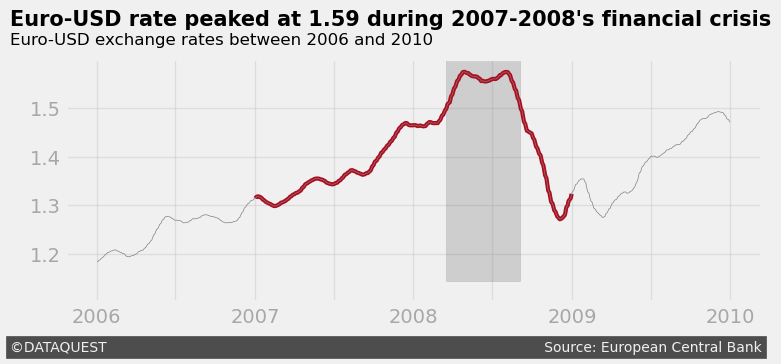

In [30]:
style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(8,3))
ax.plot(crisis['Time'],crisis['rolling_mean'],color='#af0b1e',lw=3)
ax.plot(comparison['Time'],comparison['rolling_mean'],color='grey',lw=0.5)

ax.set_ylim(1.1,1.6)
ax.set_yticks([1.2,1.3,1.4,1.5])
ax.set_yticklabels(['1.2','1.3','1.4','1.5'],alpha=0.3)

ax.set_xticks(list(ax.get_xticks()))
ax.set_xticklabels(['2006','','2007','','2008','','2009','','2010'],alpha=0.3)

ax.axvspan(xmin=13955, xmax=14125, ymin=0.09,alpha=0.3, color='grey')

ax.text(12949.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",fontsize=15, weight='bold')
ax.text(12949.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010', fontsize=12)

ax.text(12949.0, 1.0, '©DATAQUEST' + ' '*100 + 'Source: European Central Bank',color = '#f0f0f0', backgroundcolor = '#4d4d4d',size=10)

ax.grid(alpha=0.5)

plt.show()

In [31]:
print(list(ax.get_xticks()))

[13149.0, 13330.0, 13514.0, 13695.0, 13879.0, 14061.0, 14245.0, 14426.0, 14610.0]


We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

In [33]:
pandemic = euro_to_dollar[euro_to_dollar['Year']==2020]
base = euro_to_dollar[(euro_to_dollar['Year']>=2016)&(euro_to_dollar['Year']<2021)]

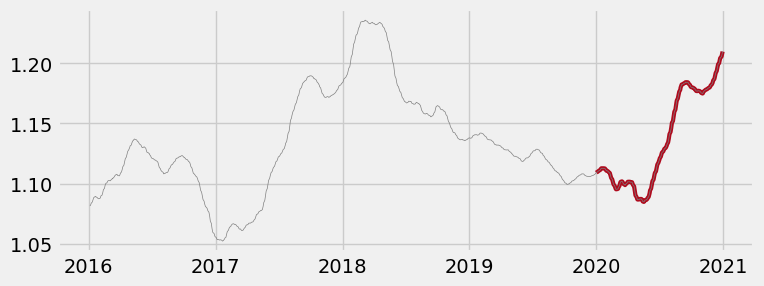

In [34]:
style.use('fivethirtyeight')
fig,ax=plt.subplots(figsize=(8,3))
ax.plot(pandemic['Time'],pandemic['rolling_mean'],color='#af0b1e',lw=3)
ax.plot(base['Time'],base['rolling_mean'],color='grey',lw=0.5)
plt.show()